# Projet Data Science - Automatic Fact-Checking

    Ce projet a pour but de proposer des modèles de classification supervisée d'assertions faites par des figures politique selon leurs veracités. Autrement dit, nous devons proposer une approche automatique de fact-checking.
    
> Auteurs : <br>
> LAROUG Nahla - nahla.laroug@etu.umontpellier.fr<br>
> NAIDJA Yannis - yannis.naidja@etu.umontpellier.fr<br>
> OMAR SOUBAGlE Nasser - nasser.omar-soubagle@etu.umontpellier.fr<br>
> SAÏ Ismaël - ismael.sai@etu.umontpellier.fr<br><br>
> projet réalisé dans le cadre de l'UE HMIN232M du Master 1 AIGLE de l'Université de Montpellier.

## 1 - Extraction des données 

- Récupération des 4 csv en fonction des 4 Rating ( True, False, Other, Mixture )car le site limite l'extraction personalisée à 10000 entrées. 
- Concaténation des 4 csv en un DataFrame qui comporte 30000 entrées et trés peu de cases vides comparé aux csv initial de 40000 entrée dont la majorité des

In [1]:
import pandas as pd
import random as random
import glob, os 

df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "./smalldataset/*.csv"))))

row, col = df.shape

print("Size of the dataframe :" + str(df.size) + " ("+str(row)+"*"+str(col)+")")


df = df.dropna(axis = 0, how = 'any')

row, col = df.shape


print("Size of the dataframe after removing null values :" + str(df.size) + " ("+str(row)+"*"+str(col)+")")

df.head()

## aucune valeur nulle dans le df 






Size of the dataframe :342328 (24452*14)
Size of the dataframe after removing null values :201544 (14396*14)


id  \
0  http://data.gesis.org/claimskg/claim_review/36...   
3  http://data.gesis.org/claimskg/claim_review/48...   
4  http://data.gesis.org/claimskg/claim_review/80...   
6  http://data.gesis.org/claimskg/claim_review/3a...   
8  http://data.gesis.org/claimskg/claim_review/09...   

                                                text        date  truthRating  \
0  'There will be no public funding for abortion ...  2010-03-21            3   
3  Says 'as Co-Chair of the Joint Ways & Means Co...  2012-09-28            3   
4  Says Gary Farmer’s claim that he 'received an ...  2016-07-08            3   
6  Will Hurd 'tends to have a 96 percent straight...  2015-10-23            3   
8  A video shows a group of Muslims ripping up an...     Unknown            3   

  ratingName        author                                           headline  \
0       True   Bart Stupak  Stupak revises abortion stance on health care ...   
3       True    Mary Nolan  Did Mary Nolan secure funding for Milwaukie br...   
4       True   Jim Waldman  Florida Senate candidate never actually receiv...   
6       True  Pete Gallego  Pete Gallego says Will Hurd votes with House R...   
8       True       Unknown  Did This Video Show Muslims Ripping Up an Amer...   

                                named_entities_claim  \
0  Abortion rights,Barack Obama,Bart Stupak,Ben N...   
3  Carolyn Tomei,Dave Hunt,Fetsch,Jeff Merkley,Ka...   
4  Gary Farmer,Gwyndolen Clarke-Reed,Jim Waldman,...   
6  114th Congress,2016 general election,CQ Roll C...   
8  Cuba,Facebook,Guantanamo Bay,Guantánamo Bay,Gu...   

                  named_entities_article  \
0                               abortion   
3  Portland-Milwaukie Light Rail project   
4                            Gary Farmer   
6                   Republican,Will Hurd   
8                          New York City   

                                            keywords      source  \
0                               Abortion,Health Care  politifact   
3         State Budget,State Finances,Transportation  politifact   
4                                               Guns  politifact   
6  Bipartisanship,Congress,Redistricting,Voting R...  politifact   
8                            flag desecration, islam      snopes   

                   sourceURL  \
0  http://www.politifact.com   
3  http://www.politifact.com   
4  http://www.politifact.com   
6  http://www.politifact.com   
8      http://www.snopes.com   

                                                link language  
0  http://www.politifact.com/truth-o-meter/statem...  English  
3  http://www.politifact.com/oregon/statements/20...  English  
4  http://www.politifact.com/florida/statements/2...  English  
6  http://www.politifact.com/texas/statements/201...  English  
8  https://www.snopes.com/fact-check/muslims-rip-...  English

## 2 - Pré-traitement des données.
Le prétraitement des textes est une tâche importante et une étape critique de l'analyse des textes et du traitement du langage naturel (TAL). Il transforme le texte en une forme prévisible et analysable afin que les algorithmes d'apprentissage automatique puissent être plus performants. Il existe plusieurs façon de prétraiter le texte. 


### 2.1 - Lowering case
C'est la technique de prétraitement de texte la plus courante et la plus simple.
Applicable à la plupart des problèmes de text mining et de NLP. L'objectif principal est 
de convertir le texte en minuscules. De ce fait, Bouteille et bouteille seront traité de 
la même manière.
    

In [2]:
df['text_lower']  = df['text'].str.lower()
df['text_lower'].head()

0    'there will be no public funding for abortion ...
3    says 'as co-chair of the joint ways & means co...
4    says gary farmer’s claim that he 'received an ...
6    will hurd 'tends to have a 96 percent straight...
8    a video shows a group of muslims ripping up an...
Name: text_lower, dtype: object

### 2.2 - Removal of Punctuations

Nous voulons pouvoir nous concentrer sur les mots les plus importants. La ponctuaction n'a que peu d'importance pour nous. De ce fait, nous allons la retirer.


In [3]:
df['text_punct'] = df['text_lower'].str.replace('[^\w\s]','')
df['text_punct'].head()

0    there will be no public funding for abortion i...
3    says as cochair of the joint ways  means commi...
4    says gary farmers claim that he received an a ...
6    will hurd tends to have a 96 percent straight ...
8    a video shows a group of muslims ripping up an...
Name: text_punct, dtype: object

### 2.3 - Stop-word removal

Les mots d'arrêt sont un ensemble de mots couramment utilisés dans une langue. Des exemples de mots d'arrêt en anglais sont "a", "we", "the", "is", "are", etc.

L'idée avec le stop-word removal, est qu'en supprimant les mots peu informatifs du texte, nous pouvons nous concentrer sur les mots importants à la place. 

Nous pouvons soit créer nous-mêmes une liste personnalisée de mots d'arrêt (en fonction des cas d'utilisation), soit utiliser des bibliothèques prédéfinies.

Ici nous avons choisi de nous servir de la bibliothèque nltk.

In [4]:
import nltk 
from nltk.corpus import stopwords

#decommenté cette ligne si vous n'avez pas stopwords de nltk. Remettre en commentaire une fois installé.
#nltk.download('stopwords')

stop = stopwords.words('english')

def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop])


df["text_stop"] = df["text_punct"].apply(stopwords)
df["text_stop"].head()


0                  public funding abortion legislation
3    says cochair joint ways means committee secure...
4    says gary farmers claim received nra absolute lie
6    hurd tends 96 percent straight republican stra...
8    video shows group muslims ripping american fla...
Name: text_stop, dtype: object

### 2.4 - Common word removal

Nous pouvons supprimer des mots courants de nos données textuelles. 

Commençons par vérifier les 10 mots les plus fréquents dans nos données textuelles et regardons s'ils ont l'air important.

In [5]:
from collections import Counter

cnt = Counter()
for text in df["text_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)



[('says', 2631),
 ('president', 1260),
 ('obama', 1016),
 ('trump', 927),
 ('said', 798),
 ('us', 775),
 ('percent', 719),
 ('donald', 712),
 ('new', 623),
 ('people', 612)]

In [6]:
freq = set([w for (w, wc) in cnt.most_common(10)])

def freqwords(text):
    return " ".join([word for word in str(text).split() if word not 
in freq])
df["text_common"] = df["text_stop"].apply(freqwords)
df["text_common"].head()

0                  public funding abortion legislation
3    cochair joint ways means committee secured key...
4         gary farmers claim received nra absolute lie
6    hurd tends 96 straight republican straight par...
8    video shows group muslims ripping american fla...
Name: text_common, dtype: object

### 2.5 - Rare word removal

Certains des mots qui sont de nature très unique comme les noms, les marques, les noms de produits, et certains des caractères sonores, comme les omissions html, doivent également être supprimés pour différentes tâches de NLP. 
Nous utilisons également la longueur des mots comme critère pour supprimer les mots de longueur très courte ou très longue.


In [7]:
freq = pd.Series(' '.join(df['text_common']).split()).value_counts()[-10:] 
freq = list(freq.index)
display(freq)


['kinnison',
 'madefortv',
 'guam',
 'jellylike',
 'nonblacks',
 'alawa',
 'barometric',
 'megabucks',
 'noninterventionism',
 'calf']

In [8]:

df['text_rare'] = df['text_common'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['text_rare'].head()


0                  public funding abortion legislation
3    cochair joint ways means committee secured key...
4         gary farmers claim received nra absolute lie
6    hurd tends 96 straight republican straight par...
8    video shows group muslims ripping american fla...
Name: text_rare, dtype: object

### 2.6 - Spelling Correction

Les données peuvent comporter des fautes d'orthographe. 
La correction orthographique est donc une étape de prétraitement utile, car elle nous permet d'éviter les mots multiples.
Par exemple, "text" et "txt" seront traités comme des mots différents même s'ils sont utilisés dans le même sens. Cela peut être fait par la bibliothèque textblob.


In [9]:
from textblob import TextBlob

df['text_rare'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                  public funding abortion legislation
3    chair joint ways means committee secured key p...
4         mary farmers claim received era absolute lie
6    hard tends 96 straight republican straight par...
8    video shows group muslin lipping american flag...
Name: text_rare, dtype: object

### 2.7 - Tokenisation

La tokenisation consiste à diviser le texte en une séquence de mots ou de phrases.



In [10]:
import re

def tokenization(text):
    text = re.split('\W+', text)
    return text

df['text_token'] = df['text_rare'].apply(lambda x: tokenization(x.lower()))
df[['text_token']].head()

text_token
0           [public, funding, abortion, legislation]
3  [cochair, joint, ways, means, committee, secur...
4  [gary, farmers, claim, received, nra, absolute...
6  [hurd, tends, 96, straight, republican, straig...
8  [video, shows, group, muslims, ripping, americ...

###  Lemmatization

La lemmatisation est le processus de conversion d'un mot en sa forme de base. 

La différence entre la lemmatisation et le stemming est que la lemmatisation tient compte du contexte et convertit le mot dans sa forme de base significative, alors que la dérivation ne fait qu'enlever les derniers caractères, ce qui entraîne souvent des significations incorrectes et des fautes d'orthographe. 


In [11]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join(
        [lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)
                             ) for word, pos in pos_tagged_text]
                    )

df["text_lemma"] = df["text_rare"].apply(lemmatize_words)
df["text_lemma"].head()


0                  public funding abortion legislation
3    cochair joint way mean committee secure key pi...
4           gary farmer claim receive nra absolute lie
6    hurd tend 96 straight republican straight part...
8    video show group muslims rip american flag yor...
Name: text_lemma, dtype: object

display(df.info(verbose=True))

### 2.8 Equilibre dans de valeur dans le dataset

On voit que nos données sont mals réparties, il ya beaucoup plus de label faux et mixture que de label vrai ce qui donne un modèle moins performant car les classifieurs auront moins tendeance a répondre vrai que faux ou mixture avec de telles données.


In [12]:
df["ratingName"].value_counts()



False      6460
MIXTURE    5537
True       2399
Name: ratingName, dtype: int64

Maintenant, et pour répondre à l'énoncé du projet, on peut séparer nos données deux pour éffectuer une classification binaire avec
1) Faux vs Vrai
2) Faux et Vrai vs Mixture 



Repartition au debut: 
1    6460
2    5537
3    2399
Name: truthRating, dtype: int64


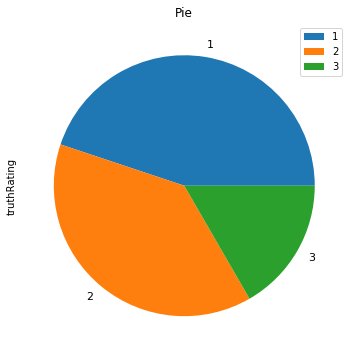

True vs False: 
1 pour false, 3 pour true
1    6460
3    2399
Name: truthRating, dtype: int64


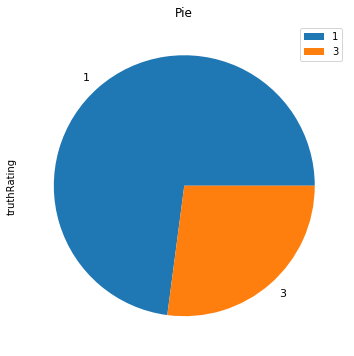

TrueFalse vs Mixture: 
1 pour vrai/faux, 0 pour mixture
1    8859
0    5537
Name: TFvM, dtype: int64


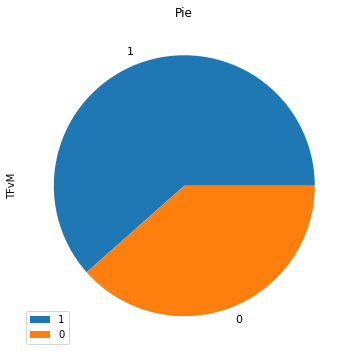

In [13]:
import matplotlib.pyplot as plt

print("Repartition au debut: ")
print(df["truthRating"].value_counts())

df["truthRating"].value_counts().plot(kind='pie', 
                                  figsize=(6,6),
                                  title='Pie', 
                                  fontsize=11, 
                                  legend=True)

plt.show()

#ne garder que les faux et vrai
#creation d'un nouveau dataframe qui contiendra moins de lignes
dfvf = df[df.truthRating != 2]
print("True vs False: ")
print("1 pour false, 3 pour true")
print(dfvf["truthRating"].value_counts())


dfvf["truthRating"].value_counts().plot(kind='pie', 
                                  figsize=(6,6),
                                  title='Pie', 
                                  fontsize=11, 
                                  legend=True)

plt.show()

#ne garder que fauxvrai vs mixture 
#on donne 1 si la valeur vaut vrai/faux et 0 si elle vaut mixture

df["TFvM"] = df['truthRating'].apply(lambda x: 1 if x == 1 or x == 3 else 0)
print("TrueFalse vs Mixture: ")
print("1 pour vrai/faux, 0 pour mixture")
print(df["TFvM"].value_counts())

df["TFvM"].value_counts().plot(kind='pie', 
                                  figsize=(6,6),
                                  title='Pie', 
                                  fontsize=11, 
                                  legend=True)

plt.show()




### 3 - Classification 

Maintenant que l'on a traité les données de plusieures façon dans notre df on peut appliquer des modèles.
Les différents classifier de Scikit-learn ne sont pas compatible avec du texte. Il faut donc re-processer les données déjà nettoyées.
On utilisera ici la technique du sac de mot ici qui consiste transformer les différentes occurences d'un mots en un entier à donner au modèle.

L'occurence n'est pas vraiment précise car les phrase les plus longues auront naturellement plus d'occurences de mot.

On peut se baser la fréquence de mot au lieu de l'occurence.

Enfin, on peut finalement utiliser le tf-idf pour avoir une fréquence pondérée ce qui ajoute de la précision.

L'utilisation d'un pipeline facilite l'utilisation du code

### 3.1 Classification naive de donnée textuelles.

Ici on utilise CountVectorizer pour donner un entier à chaque occurence de mot depuis nos données déjà lemmatizées puis le tf-idf pour équilibrer la fréquence. On donnera un échantillon de mot à prédire pour regarder dans un premier temps ce que donne la prédiction.

In [14]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

count_vect = CountVectorizer()

## exemple de prediction vrai vs faux

datatarget = dfvf['truthRating']

print(datatarget.shape)

X_train_counts = count_vect.fit_transform(dfvf['text_lemma'])
print(X_train_counts.shape)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print(X_train_tf.shape)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)



clf = LogisticRegression(solver='lbfgs',max_iter=30000).fit(X_train_tfidf, datatarget )

docs_new = ['Alien exists', 'Mankind did not go to Moon']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

print(predicted)

print("Notre modèle prédit faux pour les deux phrases qu'on lui a donnée ce qui paraît cohérent")



#FALSE = 1
#MIXTURE = 2
#TRUE = 3







(8859,)
(8859, 13925)
(8859, 13925)
(8859, 13925)
[1 1]
Notre modèle prédit faux pour les deux phrases qu'on lui a donnée ce qui paraît cohérent


### 3.1.1 Test de l'accuracy des différents Classifier 

Recherche avec gridsearch sur différents classifier de la meilleurs accuracy et des meilleurs paramètres pour chacun. On met différentes valeurs dans le tableau params pour que le gridsearch ait plusieurs combinaisons de paramètres. On ne garderas que les deux classifier donnant la meilleur performance et l'on réutilisera la meilleur combinaison d'hyperparamètres tout a long du projet.


In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss


datatarget = dfvf['truthRating']

print(datatarget.shape)

X_train_counts = count_vect.fit_transform(dfvf['text_lemma'])
print(X_train_counts.shape)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print(X_train_tf.shape)

validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30

X_train,X_test,y_train,y_test=train_test_split(X_train_tf, 
                                               datatarget, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

seed=7
models = [
            'ADB',
            'GBC',
            'RFC',
            'KNC',
            'SVC',
            'logisticRegression'
         ]
clfs = [
        AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed,n_jobs=-1),
        KNeighborsClassifier(n_jobs=-1),
        SVC(random_state=seed,probability=True),
        LogisticRegression(solver='lbfgs',max_iter = 20000)
        ]

params = {
            models[0]:{'learning_rate':[0.01], 'n_estimators':[150]},
    
            models[1]:{'learning_rate':[0.01],'n_estimators':[50,100], 'max_depth':[3],
                       'min_samples_split':[2,5],'min_samples_leaf': [2,5]},
    
            models[2]:{'n_estimators':[100], 
                       'min_samples_split':[2],
                      'min_samples_leaf': [5]},
    
            models[3]:{'n_neighbors':[2,5,10], 'weights':['distance'],'leaf_size': [2,5,10]},
    
            models[4]: {'C':[100], 'tol': [0.005],
                       'kernel':['sigmoid','linear']},
    
            models[5]: {'C':[2000], 'tol': [0.0001], 
                        'solver' : ['lbfgs', 'liblinear', 'saga']}
         }

y_test = 0
test_scores = []


for name, estimator in zip(models,clfs):
    print(name)
    clf = GridSearchCV(estimator, params[name], scoring='accuracy',
                       refit='True', n_jobs=-1, cv=5)
    clf.fit(X_train, y_train)

    print("best params: " + str(clf.best_params_))
    print("best scores: " + str(clf.best_score_))
    estimates = clf.predict_proba(X_test)
    

(8859,)
(8859, 13925)
(8859, 13925)
ADB
best params: {'learning_rate': 0.01, 'n_estimators': 150}
best scores: 0.7199849907254011
GBC
best params: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
best scores: 0.720360930575025
RFC
best params: {'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.7192309870722002
KNC
best params: {'leaf_size': 2, 'n_neighbors': 10, 'weights': 'distance'}
best scores: 0.7184890191580646
SVC
best params: {'C': 100, 'kernel': 'linear', 'tol': 0.005}
best scores: 0.6846140775667984
logisticRegression
best params: {'C': 2000, 'solver': 'liblinear', 'tol': 0.0001}
best scores: 0.7011802104130382


On voit que les classifier RFC ET GBC s'en sortent le mieux avec 68 % d'accuracy, on va donc les séléctionner pour les tester avec différents features et voir comment ils se comportent. On gardera aussi les hyperparamètres qui donnent les meilleurs résultats pour ces deux classifiers.

#### 3.2 - Classification avec plusieurs features et un Pipeline

On utilise ici plusieurs features pour tester l'accuracy de notre modèle avec un classifier NB
On séléctionne plusieurs features de nos dataframes, ce qui intuitivement nous paraissent les plus impactant, puis on les fusionnes pour que le fit se réalise et enfin on regarde l'accuracy obtenue. On utilise ici un pipeline pour accélérer le processus de traitement des données textuelles.

In [16]:
### prediction multi feature avec pipeline
from sklearn.pipeline import Pipeline

def applyClassification(df,colonnes,clf,target) :
    
    text_clf = Pipeline([
     ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(use_idf=True)),
     ('clf', clf), ])
    
    colonnesTrain = colonnes
    datatarget = df[target]
    
    trainset = df[colonnesTrain]
    trainset = trainset.apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

    validation_size=0.3 #30% du jeu de données pour le test

    testsize= 1-validation_size
    seed=30

    X_train,X_test,y_train,y_test=train_test_split(trainset, 
                                               datatarget, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)
    text_clf.fit(X_train, y_train)
    print("prediction avec les features: ")
    print(colonnesTrain)
    result = text_clf.predict(X_test)
    print('\n accuracy :',accuracy_score(result, y_test),'\n')

    conf = confusion_matrix(y_test, result)
    print ('\n matrice de confusion \n',conf)
    print ('\n',classification_report(y_test, result))
    return 
    
  
    

### 3.2.1 Classifier RandomForest

On commence ici avec un algorithme basé sur les arbres. Nous savons que notre jeu de donnée de classe est déséquilibré, mais les algorithmes de decision sur les arbres s'en sortent plutôt bien sur ce type de jeu données à cause de leur structures hiérarchiques qui leur permet d'apprendre des signaux provenant des deux classes. Nous devrions donc obtenir une accuracy décente. On verra aussi que l'ajout de métadonnées comme features améliorera légérement les résultats de notre modèle.


In [17]:


clf = RandomForestClassifier(random_state=seed,n_jobs=-1, 
    criterion = 'gini', min_samples_leaf= 4, min_samples_split = 2, n_estimators = 100)

colonnesTrain =['text']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_stop']
applyClassification(dfvf,colonnesTrain,clf,'truthRating')

colonnesTrain =['text_rare']
applyClassification(dfvf,colonnesTrain,clf,'truthRating')

colonnesTrain =['text_lemma']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_lemma','author']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_lemma','headline','author']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_lemma','headline','author','named_entities_claim']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_lemma','headline','author','named_entities_claim','keywords']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_lemma','headline','author','named_entities_claim','keywords','source']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_lemma','headline','author','named_entities_claim','keywords','source','link']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_lemma','headline','author','named_entities_claim','keywords','source','link','language']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 






prediction avec les features: 
['text']

 accuracy : 0.7362141244759755 


 matrice de confusion 
 [[4511   37]
 [1599   55]]

               precision    recall  f1-score   support

           1       0.74      0.99      0.85      4548
           3       0.60      0.03      0.06      1654

    accuracy                           0.74      6202
   macro avg       0.67      0.51      0.45      6202
weighted avg       0.70      0.74      0.64      6202

prediction avec les features: 
['text_stop']

 accuracy : 0.7365366010964205 


 matrice de confusion 
 [[4409  139]
 [1495  159]]

               precision    recall  f1-score   support

           1       0.75      0.97      0.84      4548
           3       0.53      0.10      0.16      1654

    accuracy                           0.74      6202
   macro avg       0.64      0.53      0.50      6202
weighted avg       0.69      0.74      0.66      6202

prediction avec les features: 
['text_rare']

 accuracy : 0.7333118348919704 


 matr

En comparant de manière empirique les résultats, on voit que les features apportant le plus d'accuracy sont "author", "headline" pour ce modèle.En regardant les matrices de confusions, on voit que le rappel pour les valeur true est médiocre ce qui est du à un déséquilibre dans les variables de classes. Voyons si la même chose se produit avec un autre classifieur. 

### 3.2.2 Classifier LR 

In [18]:
clf =  LogisticRegression(solver='saga',max_iter = 20000)

colonnesTrain =['text']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_stop']
applyClassification(dfvf,colonnesTrain,clf,'truthRating')

colonnesTrain =['text_rare']
applyClassification(dfvf,colonnesTrain,clf,'truthRating')

colonnesTrain =['text_lemma']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_lemma','author']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_lemma','headline','author']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_lemma','headline','author','named_entities_claim']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_lemma','headline','author','named_entities_claim']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_lemma','headline','author','named_entities_claim','keywords']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_lemma','headline','author','named_entities_claim','keywords','source']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_lemma','headline','author','named_entities_claim','keywords','source','link']
applyClassification(dfvf,colonnesTrain,clf,'truthRating') 

colonnesTrain =['text_lemma','headline','author','named_entities_claim','keywords','source','link','language']
applyClassification(dfvf,colonnesTrain,clf,'truthRating')  







prediction avec les features: 
['text']

 accuracy : 0.7355691712350855 


 matrice de confusion 
 [[4462   86]
 [1554  100]]

               precision    recall  f1-score   support

           1       0.74      0.98      0.84      4548
           3       0.54      0.06      0.11      1654

    accuracy                           0.74      6202
   macro avg       0.64      0.52      0.48      6202
weighted avg       0.69      0.74      0.65      6202

prediction avec les features: 
['text_stop']

 accuracy : 0.7350854563044179 


 matrice de confusion 
 [[4505   43]
 [1600   54]]

               precision    recall  f1-score   support

           1       0.74      0.99      0.85      4548
           3       0.56      0.03      0.06      1654

    accuracy                           0.74      6202
   macro avg       0.65      0.51      0.45      6202
weighted avg       0.69      0.74      0.64      6202

prediction avec les features: 
['text_rare']

 accuracy : 0.7333118348919704 


 matr

Ici ce sont les features "author", "headline" , "source" qui ont apportés le plus de gain en accuracy. Les accuracy sont autour de 70% ce qui est décent, mais ce n'est pas parce que nous avons un bon modèle mais plutot parce que nos données sont désiquilibrées, le modèle pourrait se contenter de prédire toujours vrai et arriver autour de 70% d'accuracy puisque notre jeu de données de test de 10000 entrée comporte 7000 vrai et 3000 faux. En regardant les matrices de confusions, on voit que c'est ce qui se produit.

### 3.3 - Réequilibrage de classes.


On note en regardant les diverses matrices de confusion obtenues que les prédictions des faux négatifs sont trés mauvais, notre modèle est trés médiocre pour détecter une assertion fausse. Cela est du à l'inéquilibre qui réside dans les variables de classes du jeu de données. Il ya beaucoup plus de label faux que de label vrai donc l'apprentissage de l'algorithme est biaisé. Voyons maintenant diverses méthodes pour équilibrer le jeu de données et voyons quel résultats l'on obtient.


### 3.3.1 - DownSampling


nombre de faux: 6460
nombre de vrai: 2399
Aprés under sampling, 3 pour vrai , 1 pour faux  under-sampling:
3    2399
1    2399
Name: truthRating, dtype: int64


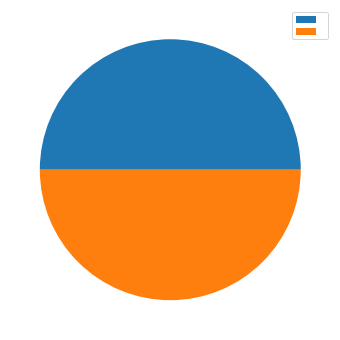

prediction avec les features: 
['text_lemma', 'headline', 'author', 'named_entities_claim', 'keywords', 'source', 'link', 'language']

 accuracy : 0.6484072640666865 


 matrice de confusion 
 [[ 985  698]
 [ 483 1193]]

               precision    recall  f1-score   support

           1       0.67      0.59      0.63      1683
           3       0.63      0.71      0.67      1676

    accuracy                           0.65      3359
   macro avg       0.65      0.65      0.65      3359
weighted avg       0.65      0.65      0.65      3359



In [19]:
nbfaux, nbvrai =  dfvf["truthRating"].value_counts()

print("nombre de faux:",nbfaux)
print("nombre de vrai:",nbvrai)

df_class_true = dfvf[dfvf['truthRating'] == 3]
df_class_false = dfvf[dfvf['truthRating'] == 1]


df_class_false_under = df_class_false.sample(nbvrai)
df_under = pd.concat([df_class_false_under, df_class_true], axis=0)

print('Aprés under sampling, 3 pour vrai , 1 pour faux  under-sampling:')
print(df_under["truthRating"].value_counts())

df_under["truthRating"].value_counts().plot(kind='pie', 
                                  figsize=(6,6),
                                  title='Pie', 
                                  fontsize=11, 
                                  legend=True)

plt.show()

clf = RandomForestClassifier(random_state=seed,n_jobs=-1, 
    criterion = 'gini', min_samples_leaf= 4, min_samples_split = 2, n_estimators = 100)


colonnesTrain =['text_lemma','headline','author','named_entities_claim','keywords','source','link','language']
applyClassification(df_under,colonnesTrain,clf,'truthRating') 






On voit que l'accuracy a baissé , mais en regardant la matrice de confusion on voit que l'on a fait un grand pas en avant dans la prédiction des faux positifs. On a globalement un prédiction plus équilibrée. 

### 3.3.2 Up-Sampling

Aprés Up sampling, 3 pour vrai , 1 pour faux  under-sampling:
3    6460
1    6460
Name: truthRating, dtype: int64


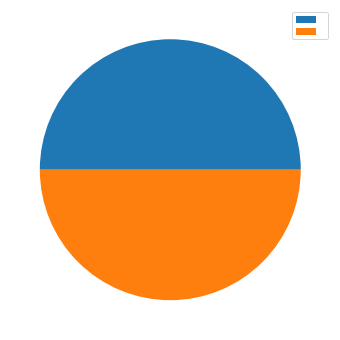

prediction avec les features: 
['text_lemma', 'headline', 'author', 'named_entities_claim', 'keywords', 'source', 'link', 'language']

 accuracy : 0.7494471472799646 


 matrice de confusion 
 [[3107 1441]
 [ 825 3671]]

               precision    recall  f1-score   support

           1       0.79      0.68      0.73      4548
           3       0.72      0.82      0.76      4496

    accuracy                           0.75      9044
   macro avg       0.75      0.75      0.75      9044
weighted avg       0.75      0.75      0.75      9044



In [20]:
df_class_true_up = df_class_true.sample(nbfaux,replace=True)
df_upper = pd.concat([df_class_true_up, df_class_false], axis=0)

print('Aprés Up sampling, 3 pour vrai , 1 pour faux  under-sampling:')
print(df_upper["truthRating"].value_counts())

df_upper["truthRating"].value_counts().plot(kind='pie', 
                                  figsize=(6,6),
                                  title='Pie', 
                                  fontsize=11, 
                                  legend=True)

plt.show()

clf = RandomForestClassifier(random_state=seed,n_jobs=-1, 
    criterion = 'gini', min_samples_leaf= 4, min_samples_split = 2, n_estimators = 100)

colonnesTrain =['text_lemma','headline','author','named_entities_claim','keywords','source','link','language']
applyClassification(df_upper,colonnesTrain,clf,'truthRating') 

 




### 3.3.3 Over-Sampling (SMOTE)

On peut utiliser la méthode d'Oversampling (SMOTE) pour les rééquilibrer. 
Smote marche de la manière suivante pour réequilibrer un classe non équilibrée:
Pour chaque instance de la classe sous-représentée, l'algorithme cherche son voisin le plus proche et crée une nouvelle instance de la classe minoritaire à un endroit aléatoire dans la ligne entre l'instance courante observée et son voisin le plus proche. Ce qui finit par donner une classe equilibrée. Le désavantage est la création de donnée aléatoire qui ne sont pas forcément intéressantes sémantiquement.




In [21]:
from imblearn.over_sampling import SMOTE



def applySMOTEClassification(df,colonnes,clf,target) :
    
    print("avant Oversampling")
    print(df[target].value_counts())
    
    colonnesTrain = colonnes
    datatarget = df[target]
    
    trainset = df[colonnesTrain]
    trainset = trainset.apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
    
    sm = SMOTE(random_state=2)

    
    X_train_counts = count_vect.fit_transform(trainset)

    
    tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
    X_train_tf = tf_transformer.transform(X_train_counts)

    X_smote, y_smote = sm.fit_sample(X_train_tf, df[target])

    if target == "truthRating" :
        print("Apres OverSampling, nombre de label '1(vrai)': {}".format(sum(y_smote==1)))
        print("Apres OverSampling, nombre de label '3(faux)': {}".format(sum(y_smote==3)))
        
    if target == "TFvM" :
        print("Apres OverSampling, nombre de label '1(vrai et faux)': {}".format(sum(y_smote==1)))
        print("Apres OverSampling, nombre de label '0(mixture)': {}".format(sum(y_smote==0)))

    validation_size=0.3 #30% du jeu de données pour le test

    testsize= 1-validation_size
    seed=7

    X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_smote, y_smote, 
                                               random_state=seed,
                                               test_size=0.3)
    clf.fit(X_train_smote, y_train_smote)
    result = clf.predict(X_test_smote.toarray())
    print('\n accuracy :',accuracy_score(result, y_test_smote),'\n')

    conf = confusion_matrix(y_test_smote, result)
    print ('\n matrice de confusion \n',conf)
    print ('\n',classification_report(y_test_smote, result))
    return
    

clf = RandomForestClassifier(random_state=seed,n_jobs=-1, 
    criterion = 'gini', min_samples_leaf= 5, min_samples_split = 2, n_estimators = 100)

colonnesTrain =['text_lemma','headline','author']
applySMOTEClassification(dfvf,colonnesTrain,clf,'truthRating')











avant Oversampling
1    6460
3    2399
Name: truthRating, dtype: int64
Apres OverSampling, nombre de label '1(vrai)': 6460
Apres OverSampling, nombre de label '3(faux)': 6460

 accuracy : 0.8114035087719298 


 matrice de confusion 
 [[1606  338]
 [ 393 1539]]

               precision    recall  f1-score   support

           1       0.80      0.83      0.81      1944
           3       0.82      0.80      0.81      1932

    accuracy                           0.81      3876
   macro avg       0.81      0.81      0.81      3876
weighted avg       0.81      0.81      0.81      3876



On a légérement gagné en précision ici mais plus important, le rappel pour les deux classes est maintenant équilibré et voisin pour les deux classes, ce qui veut dire que l'on se trompe beaucoup moins et que le modele reconnaît beaucoup mieux les vraies et les fausses assertions. On voit ici que le f1 score, la moyenne harmonique, est trés proche pour les deux classes ce qui renforce l'idée qu'on a obtenu un modèle qui fait des prédictions plus équilibrées aprés l'oversampling. Le seul bémol de l'oversampling est qu'il génère de l'information aléatoirement qui peut ne pas vraiment avoir de sens sémantique pour notre modèle.



### 3.4 - Vrai/Faux vs Mixture

Travaillons Maintenant sur le Vrai/faux vs Mixture. Les données de classes semblent être a peu prés équilibrées avec cependant 4000 faux/vrai en plus que de mixture. On verra par la suite que l'ajout de métadonnées améliore la précision de notre modèle. On procédera ensuite à un équilibrage de classe avec SMOTE et on gagnera en précision et en rappel. On choisira comme feature la séléction donnant la meilleure précision


##### 3.4.1 Random Forest Classifier

In [22]:


print(df["TFvM"].value_counts())

clf = RandomForestClassifier(random_state=seed,n_jobs=-1, 
    criterion = 'gini', min_samples_leaf= 4, min_samples_split = 2, n_estimators = 100)

colonnesTrain =['text_lemma']
applyClassification(df,colonnesTrain,clf,'TFvM') 

colonnesTrain =['text_lemma','author']
applyClassification(df,colonnesTrain,clf,'TFvM') 

colonnesTrain =['text_lemma','author','headline']
applyClassification(df,colonnesTrain,clf,'TFvM') 

colonnesTrain =['text_lemma','headline','author','named_entities_claim']
applyClassification(df,colonnesTrain,clf,'TFvM') 

colonnesTrain =['text_lemma','headline','author','named_entities_claim','keywords']
applyClassification(df,colonnesTrain,clf,'TFvM') 

colonnesTrain =['text_lemma','headline','author','named_entities_claim','keywords','source']
applyClassification(df,colonnesTrain,clf,'TFvM')  

colonnesTrain =['text_lemma','headline','author','named_entities_claim','keywords','source','link']
applyClassification(df,colonnesTrain,clf,'TFvM')  

colonnesTrain =['text_lemma','headline','author','named_entities_claim','keywords','source','link','language']
applyClassification(df,colonnesTrain,clf,'TFvM') 








1    8859
0    5537
Name: TFvM, dtype: int64
prediction avec les features: 
['text_lemma']

 accuracy : 0.6564794602103592 


 matrice de confusion 
 [[1638 2245]
 [1217 4978]]

               precision    recall  f1-score   support

           0       0.57      0.42      0.49      3883
           1       0.69      0.80      0.74      6195

    accuracy                           0.66     10078
   macro avg       0.63      0.61      0.61     10078
weighted avg       0.64      0.66      0.64     10078

prediction avec les features: 
['text_lemma', 'author']

 accuracy : 0.6962691010121056 


 matrice de confusion 
 [[1998 1885]
 [1176 5019]]

               precision    recall  f1-score   support

           0       0.63      0.51      0.57      3883
           1       0.73      0.81      0.77      6195

    accuracy                           0.70     10078
   macro avg       0.68      0.66      0.67     10078
weighted avg       0.69      0.70      0.69     10078

prediction avec les fea

### 3.4.2 Equilibrage de classe avec SMOTE

En équilibrant nos données de classes en créeant des données aléatoires voisinnes par smote, on va considérablement gagner en précision et le rappel sera trés voisin pour les deux classes. Le seul problème est de perdre la sémantique de nos données en générant aléatoirement des données qui n'ont peut être pas de sens.

In [23]:
clf = RandomForestClassifier(random_state=seed,n_jobs=-1, 
    criterion = 'gini', min_samples_leaf= 5, min_samples_split = 2, n_estimators = 100)

colonnesTrain =['text_lemma','headline','author']
applySMOTEClassification(df,colonnesTrain,clf,'TFvM') 

avant Oversampling
1    8859
0    5537
Name: TFvM, dtype: int64
Apres OverSampling, nombre de label '1(vrai et faux)': 8859
Apres OverSampling, nombre de label '0(mixture)': 8859

 accuracy : 0.7610985703536494 


 matrice de confusion 
 [[2223  471]
 [ 799 1823]]

               precision    recall  f1-score   support

           0       0.74      0.83      0.78      2694
           1       0.79      0.70      0.74      2622

    accuracy                           0.76      5316
   macro avg       0.77      0.76      0.76      5316
weighted avg       0.76      0.76      0.76      5316



En comparant les résultats obtenus pour les deux séléctions de variables, on voit que les modèles établis concernant TruevsFalse ont de meilleurs résultats que ceux avec Mixture en terme d'accuracy, cependant ceci est à nuancé car TFvM possède 10000 lignes de plus que TvF mais si l'on se penche sur les matrices de confusions, on voit que les différents modèles obtenus aprés equilibrage font des predictions qui semblent équilibrées dans les deux cas.

### 3.5 - K-FOLD sur True/False vs Mixture et True vs False


Test des différents modèles avec du K-Fold qui reprend les meilleurs features découvert et la vectorisation par TfIdf

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
import time

def kfold_multi_classifier(models,df,colonnes,target) : 
    
    results = []
    names = []
    seed = 7
    scoring = 'accuracy'
    
   
    print("Target du k-fold : ",target)
    print(df[target].value_counts())
    trainset = df[colonnes]
    trainset = trainset.apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
    X_train_counts = count_vect.fit_transform(trainset)
    tfidf_transformer = TfidfTransformer(use_idf=True)
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    
    for name,model in models:
        kfold = KFold(n_splits=10,shuffle=True, random_state=seed)
        start_time = time.time()
        cv_results = cross_val_score(model, X_train_tfidf, df[target], cv=kfold, scoring=scoring)
        #pour avoir les paramètres utilisés dans le modèle enlever commentaire ligne suivante
        #print (model.get_params())
        print ("Time pour",name," ",time.time() - start_time)
        results.append(cv_results)
        names.append(name)
        msg = "Accuracy pour %s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg) 
        
    return    
    
    
    
    
    

Nous allons maintenant éxécuter notre k-fold sur nos deux séléctions de classes sur des jeux de données upsamplées pour avoir une répartition égale des classes.

In [25]:

models = []
models.append(('LR', LogisticRegression(solver='lbfgs',max_iter=30000)))
models.append(('KNN', KNeighborsClassifier(n_jobs=-1,n_neighbors=5, weights='distance',leaf_size=15)))
models.append(('RDF', RandomForestClassifier(n_jobs=-1,random_state=seed, 
    criterion = 'gini', min_samples_leaf= 4, min_samples_split = 2, n_estimators = 100)))



## selection des features apportant le plus de valeur à l'accuracy
colonnes =['text_lemma', 'headline', 'author', 'named_entities_claim']

print("K-fold True and False vs Mixture")
print("")

###legerement plus de true/false que de mixture, upsampling avant k-fold

df_class_truefalse = df[df['TFvM'] == 1]
df_class_mixture = df[df['TFvM'] == 0]

nbtf, nbm =  df["TFvM"].value_counts()

print("nombre de vrai/faux:",nbtf)
print("nombre de mixture:",nbm)
print("")

df_class_mixture_up = df_class_mixture.sample(nbtf,replace=True)
df_upper = pd.concat([df_class_mixture_up, df_class_truefalse], axis=0)

kfold_multi_classifier(models,df_upper,colonnes,"TFvM")

print("K-fold True vs False")
print("")

###up sampling des donnees de classes avant de run le k-fold

nbfaux, nbvrai =  dfvf["truthRating"].value_counts()

print("nombre de faux:",nbfaux)
print("nombre de vrai:",nbvrai)
print("")

df_class_true = dfvf[dfvf['truthRating'] == 3]
df_class_false = dfvf[dfvf['truthRating'] == 1]

df_class_true_up = df_class_true.sample(nbfaux,replace=True)
df_upper = pd.concat([df_class_true_up, df_class_false], axis=0)

print('Aprés Up sampling, 3 pour vrai , 1 pour faux  under-sampling:')
print(df_upper["truthRating"].value_counts())

kfold_multi_classifier(models,df_upper,colonnes,"truthRating")



K-fold True and False vs Mixture

nombre de vrai/faux: 8859
nombre de mixture: 5537

Target du k-fold :  TFvM
1    8859
0    8859
Name: TFvM, dtype: int64
Time pour LR   4.196635961532593
Accuracy pour LR: 0.778305 (0.008837)
Time pour KNN   9.283846139907837
Accuracy pour KNN: 0.781182 (0.009544)
Time pour RDF   18.34009313583374
Accuracy pour RDF: 0.777176 (0.011584)
K-fold True vs False

nombre de faux: 6460
nombre de vrai: 2399

Aprés Up sampling, 3 pour vrai , 1 pour faux  under-sampling:
3    6460
1    6460
Name: truthRating, dtype: int64
Target du k-fold :  truthRating
3    6460
1    6460
Name: truthRating, dtype: int64
Time pour LR   3.6262950897216797
Accuracy pour LR: 0.831347 (0.009570)
Time pour KNN   4.993786811828613
Accuracy pour KNN: 0.801625 (0.009404)
Time pour RDF   15.704814195632935
Accuracy pour RDF: 0.852322 (0.008652)


On voit ici que le classifier LR et KNN donnent les meilleurs résultats pour TFvM et que les classifier LR et RDF donnent les meilleurs résultats pour TvF. Nous avions upsamplés nos données de classes auparavant, mais vu les précédents résultats, on sait que l'oversampling a donné une meilleure accuracy que l'upsampling. Essayons maintenant de faire un K-fold sur LR avec de l'oversampling pour voir si on peut faire progresser notre modèle.

In [26]:

seed = 7
scoring = 'accuracy'

colonnesTrain =['text_lemma', 'headline', 'author']

trainset = dfvf[colonnesTrain]
trainset = trainset.apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
    
sm = SMOTE(random_state=2) 
X_train_counts = count_vect.fit_transform(trainset)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

X_smote, y_smote = sm.fit_sample(X_train_tf, dfvf["truthRating"])

model = RandomForestClassifier(n_jobs=-1,random_state=seed, 
    criterion = 'gini', min_samples_leaf= 4, min_samples_split = 2, n_estimators = 100)


kfold = KFold(n_splits=10,shuffle=True, random_state=seed)
cv_results = cross_val_score(model, X_smote, y_smote, cv=kfold, scoring=scoring)
#pour avoir les paramètres utilisés dans le modèle enlever commentaire ligne suivante
#print (model.get_params())

msg = "Accuracy : %f (%f)" % (cv_results.mean(), cv_results.std())
print(msg) 

Accuracy : 0.827786 (0.007703)


On voit que l'oversampling + k-fold n'améliore pas notre modèle précédent (RDF + oversampling a 85% d'accuracy) donc on restera sur l'up sampling.
